Question 3

In [3]:
# step 1 - importing all neccessary libraries
import pandas as pd
import random
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats, integrate
np.random.seed(sum(map(ord, "distribution")))
np.random.seed(sum(map(ord, "regression")))

In [15]:
# step 2
fst_series = []
scd_series = []
trd_series = []

for i in range(100):
    fst_num = random.randint(1, 4)
    scd_num = random.randint(1, 3)
    trd_num = random.randint(10000, 30000)
    
    # adding the number to the list each time
    fst_series.append(fst_num)
    scd_series.append(scd_num)
    trd_series.append(trd_num)

In [16]:
# checking the respective lengths
print(len(fst_series))
print(len(scd_series))
print(len(trd_series))

100
100
100


In [11]:
# step 3
zipped_series = zip(fst_series, scd_series, trd_series)
newseq = pd.DataFrame(list(zipped_series))

newseq

,0,1,2
0,1,2,11906
1,1,2,11906
2,1,2,11906
3,1,2,11906
4,1,2,11906
...,...,...,...
95,1,2,11906
96,1,2,11906
97,1,2,11906
98,1,2,11906


In [17]:
# step 4
newseq.rename(columns={0: "bedrs", 1: "bathrs", 2:"price_sqr_meter"}, inplace=True)

In [24]:
#table below addresses step 6

,bedrs,bathrs,price_sqr_meter
0,2,3,19073
1,2,3,27701
2,1,2,23090
3,4,2,24703
4,2,3,23642
...,...,...,...
95,4,1,21888
96,2,1,24938
97,1,2,29418
98,3,2,23232


In [19]:
# step 5
newseq["bigcolumn"] = first_series + second_series + third_series

ValueError: Length of values does not match length of index

In [26]:
#step 7
newseq = newseq.reindex(list(range(300)))

In [20]:
newseq

,bedrs,bathrs,price_sqr_meter
0,1,2,11906
1,1,2,11906
2,1,2,11906
3,1,2,11906
4,1,2,11906
...,...,...,...
95,1,2,11906
96,1,2,11906
97,1,2,11906
98,1,2,11906


Question 4 

In [59]:
import datetime
raw_data_path = "https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/06_Stats/Wind_Stats/wind.data"
raw_df = pd.read_csv(raw_data_path, sep="\s+")

In [60]:
raw_df.head()

,Yr,Mo,Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,61,1,1,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,61,1,2,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,61,1,3,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,61,1,4,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,61,1,5,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


In [63]:
#function to add year, month and day together
def to_datetime(year, month, day):
    res = f"19{int(year)}-{int(month)}-{int(day)}"
    return res

In [65]:
raw_df["date_time"] =raw_df.apply(lambda x: to_datetime(x['Yr'], x['Mo'], x['Dy']), axis=1)


raw_df.drop(["Yr","Mo", "Dy"], axis = 1, inplace = True)
raw_df.head()


,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL,date_time
0,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04,1961-1-1
1,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83,1961-1-2
2,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71,1961-1-3
3,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88,1961-1-4
4,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83,1961-1-5


In [66]:
# step 5
raw_df["date_time"] = pd.to_datetime(raw_df["date_time"], infer_datetime_format=True)


raw_df.head()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL,date_time
0,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04,1961-01-01
1,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83,1961-01-02
2,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71,1961-01-03
3,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88,1961-01-04
4,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83,1961-01-05


In [67]:
print(raw_df["date_time"].dtypes)
raw_df.set_index('date_time', inplace=True)

datetime64[ns]


In [74]:
raw_df.head()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
date_time,,,,,,,,,,,,
1961-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
1961-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83
1961-01-06,13.21,8.12,9.96,6.67,5.37,4.50,10.67,4.42,7.17,7.50,8.12,13.17
1961-01-07,13.50,14.29,9.50,4.96,12.29,8.33,9.17,9.29,7.58,7.96,13.96,13.79
1961-01-08,10.96,9.75,7.62,5.91,9.62,7.29,14.29,7.62,9.25,10.46,16.62,16.46


In [75]:
data_gap = raw_df.isnull().sum()
data_gap

RPT    0
VAL    0
ROS    0
KIL    0
SHA    0
BIR    0
DUB    0
CLA    0
MUL    0
CLO    0
BEL    0
MAL    0
dtype: int64

In [71]:
data_present = raw_df.notnull().sum().sum()
data_present

78857

In [73]:
# dropping all the NA's
raw_df.dropna(inplace=True)

In [76]:
raw_df.mean().mean()

10.222465245951712

In [77]:
# step 9
loc_stats = raw_df.describe()
loc_stats

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
count,6546.000000,6546.000000,6546.000000,6546.000000,6546.000000,6546.000000,6546.000000,6546.000000,6546.000000,6546.000000,6546.000000,6546.000000
mean,12.359979,10.640267,11.656396,6.298587,10.448923,7.085066,9.793006,8.486601,8.490257,8.696705,13.110668,15.603129
std,5.618805,5.268695,5.007805,3.600942,4.933988,3.967735,4.978030,4.498299,4.165947,4.500488,5.829054,6.702178
min,0.670000,0.210000,1.500000,0.000000,0.130000,0.000000,0.000000,0.000000,0.000000,0.040000,0.130000,0.670000
25%,8.120000,6.670000,7.970000,3.580000,6.750000,4.000000,6.000000,5.090000,5.370000,5.330000,8.670000,10.710000
50%,11.710000,10.130000,10.920000,5.750000,9.960000,6.830000,9.210000,8.080000,8.170000,8.250000,12.500000,15.000000
75%,15.920000,14.040000,14.670000,8.380000,13.540000,9.670000,12.960000,11.420000,11.170000,11.580000,16.880000,19.860000
max,35.800000,33.370000,33.840000,28.460000,37.540000,26.160000,30.370000,31.080000,25.880000,28.210000,42.380000,42.540000


In [78]:
# step 10
day_stats = raw_df.apply(pd.Series.describe, axis=1)
day_stats.head()

,count,mean,std,min,25%,50%,75%,max
date_time,,,,,,,,
1961-01-04,12.0,6.619167,3.198126,1.79,4.5700,5.855,9.1175,11.75
1961-01-05,12.0,10.630000,2.445356,6.17,9.8075,11.170,12.1700,13.33
1961-01-06,12.0,8.240000,2.998063,4.42,6.3450,7.810,10.1375,13.21
1961-01-07,12.0,10.385000,3.072114,4.96,8.2375,9.395,13.5725,14.29
1961-01-08,12.0,10.487500,3.547237,5.91,7.6200,9.685,11.7925,16.62


In [80]:
january_mean = raw_df.loc[raw_df.index.month==1, :].mean()
january_mean

RPT    14.831609
VAL    12.885389
ROS    13.276275
KIL     7.152477
SHA    11.644467
BIR     8.030561
DUB    11.788336
CLA     9.486962
MUL     9.511501
CLO    10.024069
BEL    14.527848
MAL    18.041826
dtype: float64

In [81]:
# step 12
annual_freq = raw_df.resample('Y').sum()
annual_freq

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
date_time,,,,,,,,,,,,
1961-12-31,4150.58,3470.45,3836.17,2327.79,3652.53,2589.83,3275.31,2952.87,2914.46,3298.16,4512.33,4619.65
1962-12-31,4443.47,3674.61,4240.60,2521.09,3870.60,2684.35,3997.61,3196.39,3017.47,3509.16,4700.82,5198.84
1963-12-31,4676.91,3955.50,4577.52,2675.47,4279.30,3078.67,4042.63,3772.84,3249.81,3731.92,4978.19,5474.64
1964-12-31,4525.10,3996.78,4430.20,2484.33,4192.34,2770.94,3754.85,3465.05,2850.78,3736.11,5029.04,5457.17
1965-12-31,4544.75,4042.57,4324.80,2503.34,4024.05,2729.51,3875.83,3241.17,2886.21,3620.10,4731.95,5690.95
1966-12-31,4913.62,4218.38,4387.53,2681.19,4308.84,2844.69,3861.63,3224.81,3107.77,3565.67,5207.03,5952.15
1967-12-31,4649.06,4011.71,4284.88,2607.35,4245.22,2689.38,3887.99,3403.85,3155.43,3484.81,5392.71,6254.62
1968-12-31,4331.84,3831.36,4175.97,2370.83,3938.44,2220.64,3242.46,3021.52,2644.33,2866.87,4687.96,5496.40
1969-12-31,4075.72,3549.15,3979.23,2105.31,3603.98,2259.34,3126.04,2814.66,2892.45,2830.35,4606.75,5753.46


In [82]:
# step 13
month_freq = raw_df.resample('M').sum()
month_freq.head()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
date_time,,,,,,,,,,,,
1961-01-31,377.16,291.86,336.97,177.84,273.24,212.53,270.48,225.44,216.41,246.75,345.02,372.88
1961-02-28,426.45,390.97,376.22,240.31,358.23,283.00,308.57,305.40,305.46,328.29,472.29,397.82
1961-03-31,287.82,299.63,281.34,191.72,277.17,231.66,245.93,251.89,272.70,296.72,433.79,416.31
1961-04-30,321.68,282.83,299.94,174.92,253.05,194.85,207.76,212.84,220.27,217.11,334.42,308.35
1961-05-31,280.69,237.88,295.10,167.79,265.45,185.75,214.08,229.79,227.38,238.97,333.54,333.53


In [83]:
freq_week = raw_df.resample('W').sum()
freq_week.head()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
date_time,,,,,,,,,,,,
1961-01-08,61.58,52.04,50.25,28.29,42.53,31.21,54.68,29.66,40.75,42.14,57.08,66.13
1961-01-15,87.28,62.77,83.71,32.41,51.46,35.51,52.75,47.74,39.99,53.00,77.88,77.17
1961-01-22,72.60,57.00,70.09,25.76,53.80,41.63,46.97,43.75,35.35,40.16,59.96,62.08
1961-01-29,119.28,89.08,105.29,71.50,97.95,84.10,86.70,85.87,79.90,89.53,118.80,134.33
1961-02-05,117.79,108.22,88.33,57.73,93.53,63.75,85.43,59.84,68.75,66.22,98.09,83.55


Question 5

In [12]:
#step 1 pandas library already imported from above
# performing steps 2, 3, & 4
data_url = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv"

chipo = pd.read_csv(data_url, sep='\t')
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


In [13]:
# step 5 (number of observations in dataset) & 6 (number of columns in dataset)

number_obs = chipo.shape[0] #for observations
number_clmns = chipo.shape[1] #for columns
print(f"number_obs:{number_obs}, number_clmns:{number_clmns}")

number_obs:4622, number_clmns:5


In [14]:
# step 7 (printing all column names)
print(chipo.columns.values)

['order_id' 'quantity' 'item_name' 'choice_description' 'item_price']


In [19]:
#finding the dataframe index by all columns
chd = chipo[["order_id", 'quantity', 'item_name', 'choice_description', 'item_price' ]]
chd

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75


In [21]:
# step 9
chipo_qty = chipo.groupby(['item_name'])[['item_name','quantity']].sum()
chipo_qty

,quantity
item_name,
6 Pack Soft Drink,55
Barbacoa Bowl,66
Barbacoa Burrito,91
Barbacoa Crispy Tacos,12
Barbacoa Salad Bowl,10
Barbacoa Soft Tacos,25
Bottled Water,211
Bowl,4
Burrito,6


In [22]:
chipo_qty = chipo_qty.reset_index()


In [23]:
# step 9 & 10
most_ordered = chipo_qty[chipo_qty.quantity == chipo_qty.quantity.max()]
most_ordered

,item_name,quantity
17,Chicken Bowl,761


In [ ]:
# ans - Chicken Bowl was the most ordered item

In [24]:
# step 11 - to find the most ordered choice item
chipo_qty = chipo.groupby(['choice_description'])[['choice_description','quantity']].sum()
chipo_qty


,quantity
choice_description,
"[Adobo-Marinated and Grilled Chicken, Pinto Beans, [Sour Cream, Salsa, Cheese, Cilantro-Lime Rice, Guacamole]]",1
"[Adobo-Marinated and Grilled Chicken, [Sour Cream, Cheese, Cilantro-Lime Rice]]",1
[Adobo-Marinated and Grilled Chicken],1
"[Adobo-Marinated and Grilled Steak, [Sour Cream, Salsa, Cheese, Cilantro-Lime Rice, Guacamole]]",1
[Adobo-Marinated and Grilled Steak],1
...,...
"[[Tomatillo-Red Chili Salsa (Hot), Tomatillo-Green Chili Salsa (Medium)], [Rice, Black Beans, Cheese, Lettuce]]",2
"[[Tomatillo-Red Chili Salsa (Hot), Tomatillo-Green Chili Salsa (Medium)], [Rice, Black Beans, Lettuce]]",1
"[[Tomatillo-Red Chili Salsa (Hot), Tomatillo-Green Chili Salsa (Medium)], [Rice, Pinto Beans, Cheese, Lettuce]]",1


In [25]:
chipo_qty = chipo_qty.reset_index()


In [26]:
most_ordered = chipo_qty[chipo_qty.quantity == chipo_qty.quantity.max()]
most_ordered

,choice_description,quantity
15,[Diet Coke],159


In [ ]:
# ans - Diet Coke was the most ordered item in choice description

In [27]:
# step 12
chipo_qty['quantity'].sum()

3590

In [28]:
# step 13
print(chipo['item_price'].dtypes)

object


In [29]:
def to_float(dollar_value):
    price = dollar_value[1:]
    price_float = float(price)
    return price_float

res = to_float("$4.05")
res

4.05

In [31]:
chipo['item_price'] = chipo.apply(lambda x: 
                                  to_float(x['item_price']), axis=1)
chipo.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98


In [87]:
print(chipo['item_price'].dtypes)

float64


In [36]:
# step 14 revenue for period stipulated in dataset
revenue = (chipo['quantity']*chipo['item_price']).sum()
revenue

39237.02

In [33]:
# step 15 number of orders made in said period
qty_orders = chipo['quantity'].sum()
qty_orders

4972

In [37]:
# step 16 average revenue amount per order
avg_revord = round(revenue/qty_orders, 2)
avg_revord

7.89

In [39]:
# step 17 number of unique items sold
chipo['item_name'].nunique()

50

In [40]:
chipo['item_name'].value_counts()

Chicken Bowl                             726
Chicken Burrito                          553
Chips and Guacamole                      479
Steak Burrito                            368
Canned Soft Drink                        301
Chips                                    211
Steak Bowl                               211
Bottled Water                            162
Chicken Soft Tacos                       115
Chicken Salad Bowl                       110
Chips and Fresh Tomato Salsa             110
Canned Soda                              104
Side of Chips                            101
Veggie Burrito                            95
Barbacoa Burrito                          91
Veggie Bowl                               85
Carnitas Bowl                             68
Barbacoa Bowl                             66
Carnitas Burrito                          59
Steak Soft Tacos                          55
6 Pack Soft Drink                         54
Chips and Tomatillo Red Chili Salsa       48
Chicken Cr

Question 6

In [107]:
file_path = open(r"C:\Users\glory\Downloads\marriages-divorces-1867-2014.csv")
marryy_df = pd.read_csv(file_path)

marryy_df.set_index('Year', inplace=True)

Text(0, 0.5, 'Divorce and Marriage per Capita')

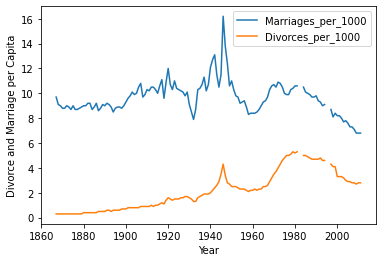

In [130]:
marryy_df[["Marriages_per_1000", "Divorces_per_1000"]].plot(kind='line')

# Namimg the y axis
plt.ylabel('Divorce and Marriage per Capita')


Question 7

In [122]:
bar_df = marryy_df[marryy_df.index.isin([1900, 1950,2000])]
bar_df

,Marriages,Divorces,Population,Marriages_per_1000,Divorces_per_1000
Year,,,,,
1900,709000.0,56000.0,76094000,9.3,0.7
1950,1667000.0,385000.0,151684000,11.0,2.5
2000,2315000.0,944000.0,282398000,8.2,3.3


Text(0, 0.5, 'Divorce and Marriage per Capita')

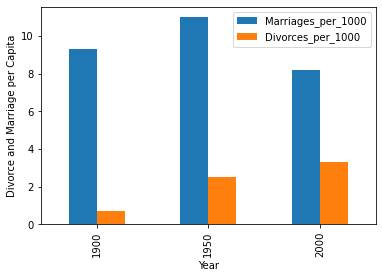

In [131]:
bar_df[["Marriages_per_1000", "Divorces_per_1000"]].plot(kind='bar' )
# Namimg the y axis
plt.ylabel('Divorce and Marriage per Capita')

Question 8

In [50]:
#accessing kill count dataset
file_path = open(r"C:\Users\glory\Downloads\actor_kill_counts.csv")
actor_kills_df = pd.read_csv(file_path)
actor_kills_df

,Actor,Count
0,Arnold Schwarzenegger,369
1,Chow Yun-Fat,295
2,Clint Eastwood,207
3,Clive Owen,194
4,Dolph Lundgren,239
5,Jet Li,201
6,Nicolas Cage,204
7,Sylvester Stallone,267
8,Tomisaburo Wakayama,226
9,Wesley Snipes,193


In [141]:
#utilising the matplot library
%matplotlib inline

Text(0, 0.5, 'Actor')

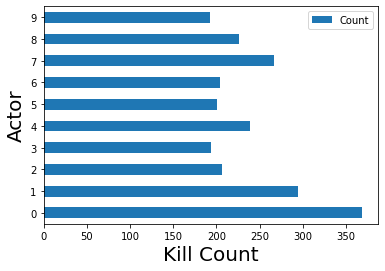

In [147]:
actor_kills_df.plot(kind='barh')

# Namimg the x and y axis
plt.xlabel('Kill Count', size ='20')
plt.ylabel('Actor', size ='20')


Question 9

In [148]:
file_path = open(r"C:\Users\glory\Downloads\/roman-emperor-reigns.csv")
romemp_df = pd.read_csv(file_path)
romemp_df.head()

,Emperor,Length_of_Reign,Cause_of_Death
0,Augustus,40.58,Possibly assassinated
1,Tiberius,22.50,Possibly assassinated
2,Caligula,4.83,Assassinated
3,Claudius,13.75,Possibly assassinated
4,Nero,13.67,Suicide


Text(0.5, 1.0, 'Pie Chart Showing Cause of Death of Roman Emperors')

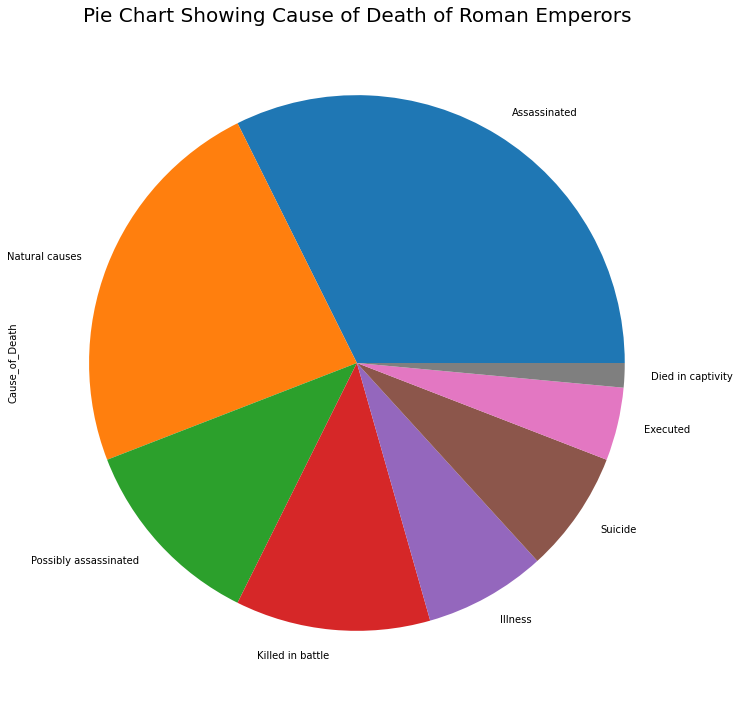

In [152]:
value_count = romemp_df["Cause_of_Death"].value_counts()
value_count.plot(kind='pie', figsize =[12, 15])

# Giving the title for the plot
plt.title("Pie Chart Showing Cause of Death of Roman Emperors", size ="20")

Question 10

In [154]:
file_path = open(r"C:\Users\glory\Downloads\arcade-revenue-vs-cs-doctorates.csv")
arcrev_df = pd.read_csv(file_path)
arcrev_df.head()

,Year,Total Arcade Revenue (billions),Computer Science Doctorates Awarded (US)
0,2000,1.196,861
1,2001,1.176,830
2,2002,1.269,809
3,2003,1.240,867
4,2004,1.307,948


[None]

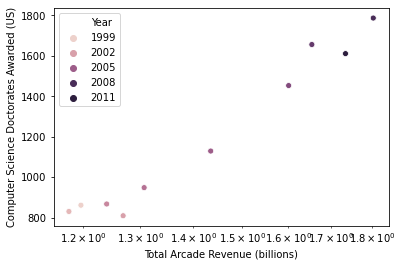

In [163]:
g =sns.scatterplot(x="Total Arcade Revenue (billions)", y = "Computer Science Doctorates Awarded (US)",
              hue="Year", data=arcrev_df);
g.set(xscale="log")